In [ ]:
import pandas as pd
df = pd.read_csv('Real_Estate_Sales_2001-2020_GL.csv')
df.head(1)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
0,2020348,2020,9/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.463,Commercial,Nan,1


# Data cleaning

### Business logic errors

In [ ]:
# Refer to "Years until sold" column row "min" (-18 years doesn't make any sense)
df.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio,Years until sold
count,9.972130e+05,997213.000000,9.972130e+05,9.972130e+05,9.972130e+05,997213.000000
mean,4.311864e+05,2010.189829,2.791437e+05,3.911512e+05,1.044637e+01,0.750900
std,6.549219e+06,6.237877,1.670610e+06,5.347270e+06,1.890192e+03,0.434742
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00,-18.000000
25%,3.044400e+04,2004.000000,8.760000e+04,1.400000e+05,4.867000e-01,1.000000
50%,7.030300e+04,2010.000000,1.383900e+05,2.250000e+05,6.246000e-01,1.000000
75%,1.518780e+05,2016.000000,2.255600e+05,3.650000e+05,7.852761e-01,1.000000
max,2.000500e+09,2020.000000,8.815100e+08,5.000000e+09,1.226420e+06,4.000000


In [ ]:
# Counts the negative values in "Years until sold" column
count_negative_values = (df['Years until sold'] < 0).sum()
print(count_negative_values)

56


In [ ]:
# Pulls up those rows that have negative values
negative_values = df[df['Years until sold'] < 0]
print(negative_values)

        Serial Number  List Year Date Recorded           Town  \
388498          60032       2006     2/26/2004         Sharon   
389700          60626       2006      9/4/2001      Newington   
407732          60508       2006     7/17/2003      Naugatuck   
409330         660578       2006     9/20/2005       Branford   
410449          60643       2006     9/25/2001      Naugatuck   
414000          60798       2006      6/5/2004        Bristol   
419243          60550       2006     7/31/2004      Newington   
420097          60072       2006    10/27/2001      Greenwich   
424369          69062       2006     9/24/2004  South Windsor   
426538          60584       2006     8/16/2005      Newington   
430204          60631       2006      9/5/2001      Newington   
443550          60429       2006     7/27/2004  South Windsor   
443976          60931       2006      8/2/2004      Stratford   
451304          61053       2006     9/12/2004      Stratford   
478225          70319    

In [ ]:
# Shows dropping the rows with negative values
df.drop(index=df.loc[df['Years until sold'] < 0].index, inplace=True)
df.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio,Years until sold
count,9.971570e+05,997157.000000,9.971570e+05,9.971570e+05,9.971570e+05,997157.000000
mean,4.312017e+05,2010.189634,2.791470e+05,3.911539e+05,1.044691e+01,0.751162
std,6.549403e+06,6.237887,1.670655e+06,5.347419e+06,1.890245e+03,0.432394
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,3.044400e+04,2004.000000,8.760000e+04,1.400000e+05,4.867000e-01,1.000000
50%,7.030300e+04,2010.000000,1.383900e+05,2.250000e+05,6.246000e-01,1.000000
75%,1.518600e+05,2016.000000,2.255600e+05,3.650000e+05,7.852817e-01,1.000000
max,2.000500e+09,2020.000000,8.815100e+08,5.000000e+09,1.226420e+06,4.000000


### Standardization errors

In [ ]:
# This was a possible column with standardization errors however I did not find any
# Gets unique values in the "Town" column and sorts them alphabetically
unique_towns_sorted = sorted(df['Town'].unique())
print(unique_towns_sorted)

['***Unknown***', 'Andover', 'Ansonia', 'Ashford', 'Avon', 'Barkhamsted', 'Beacon Falls', 'Berlin', 'Bethany', 'Bethel', 'Bethlehem', 'Bloomfield', 'Bolton', 'Bozrah', 'Branford', 'Bridgeport', 'Bridgewater', 'Bristol', 'Brookfield', 'Brooklyn', 'Burlington', 'Canaan', 'Canterbury', 'Canton', 'Chaplin', 'Cheshire', 'Chester', 'Clinton', 'Colchester', 'Colebrook', 'Columbia', 'Cornwall', 'Coventry', 'Cromwell', 'Danbury', 'Darien', 'Deep River', 'Derby', 'Durham', 'East Granby', 'East Haddam', 'East Hampton', 'East Hartford', 'East Haven', 'East Lyme', 'East Windsor', 'Eastford', 'Easton', 'Ellington', 'Enfield', 'Essex', 'Fairfield', 'Farmington', 'Franklin', 'Glastonbury', 'Goshen', 'Granby', 'Greenwich', 'Griswold', 'Groton', 'Guilford', 'Haddam', 'Hamden', 'Hampton', 'Hartford', 'Hartland', 'Harwinton', 'Hebron', 'Kent', 'Killingly', 'Killingworth', 'Lebanon', 'Ledyard', 'Lisbon', 'Litchfield', 'Lyme', 'Madison', 'Manchester', 'Mansfield', 'Marlborough', 'Meriden', 'Middlebury', 'Mi

### Missing values

In [ ]:
# Shows there's no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997157 entries, 0 to 997212
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997157 non-null  int64  
 1   List Year         997157 non-null  int64  
 2   Date Recorded     997157 non-null  object 
 3   Town              997157 non-null  object 
 4   Address           997157 non-null  object 
 5   Assessed Value    997157 non-null  int64  
 6   Sale Amount       997157 non-null  float64
 7   Sales Ratio       997157 non-null  float64
 8   Property Type     997157 non-null  object 
 9   Residential Type  997157 non-null  object 
 10  Years until sold  997157 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 91.3+ MB


### Duplicated errors

In [ ]:
# Shows there's no duplicate rows in the dataset
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Serial Number, List Year, Date Recorded, Town, Address, Assessed Value, Sale Amount, Sales Ratio, Property Type, Residential Type, Years until sold]
Index: []


In [ ]:
# Shows the number of duplicates in "Serial Number" column
# Decided to just leave it how it is since there's 997,157 total rows
num_duplicates = df.duplicated(subset=['Serial Number']).sum()
print(num_duplicates)

913624


# Answering questions

In [ ]:
# How long, on average, did it take for the different property types to get sold?

# Calculates time taken to sell each property
df['Years until sold'] = pd.to_numeric(df['Years until sold'], errors='coerce')  # Convert to numeric if needed and replaces errors with NaN
df['TimeToSell'] = df['Years until sold'] * 365  # Assuming 'Years until sold' is in years, convert to days

# Groups by property type and calculates average time to sell
average_time_to_sell = df.groupby('Property Type')['TimeToSell'].mean().sort_values(ascending=False)

# Prints the results
print("Average time to sell by property type:")
print(average_time_to_sell)

Average time to sell by property type:
Property Type
Apartments        298.909465
Public Utility    292.000000
Commercial        281.903079
Industrial        278.552632
Nan               276.305156
Single Family     275.052468
Vacant Land       274.644325
Condo             271.097444
Three Family      268.246722
Two Family        267.550557
Four Family       266.195349
Residential       264.181432
Name: TimeToSell, dtype: float64


In [ ]:
# How long, on average, did it take for the different residential types to get sold?

# Groups by residential type and calculates average time to sell
avg_time_to_sell = df.groupby('Residential Type')['TimeToSell'].mean().sort_values(ascending=False)

# Prints the results
print("Average time to sell by Residential Type:")
print(avg_time_to_sell)

Average time to sell by Residential Type:
Residential Type
Nan              276.349999
Single Family    273.626142
Condo            271.276663
Three Family     268.928267
Two Family       268.384166
Four Family      268.089330
Name: TimeToSell, dtype: float64


In [ ]:
# Which towns saw the highest sum of property sales in 2020?

# Changes "Sale Amount" datatype to float in order to answer the question
df['Sale Amount'] = df['Sale Amount'].astype(float)

# Filters the data for only year 2020
year_2020 = df[df['List Year'] == 2020]

# Groups by town and calculates sum of sale amount for each town
property_sales_by_town_yr_2020 = year_2020.groupby('Town')['Sale Amount'].sum()
sorted_property_sales_by_town = property_sales_by_town_yr_2020.sort_values(ascending=False)

# Prints the results
print("Towns sum of sales 2020:")
print(sorted_property_sales_by_town)

Towns sum of sales 2020:
Town
Willington    5.536673e+09
Stamford      4.361516e+09
Greenwich     4.229101e+09
Norwalk       1.574368e+09
New Canaan    1.180537e+09
                  ...     
Union         4.098500e+06
Bridgeport    2.325122e+06
Newington     7.747000e+05
Somers        4.670000e+05
Deep River    1.500000e+05
Name: Sale Amount, Length: 144, dtype: float64


In [ ]:
# Which towns saw the most property sales in 2020?

# Sorts the result from most to least
town_with_most_sales = year_2020['Town'].value_counts().sort_values(ascending=False)

# Prints the results
print("Number of sales 2020:")
print(town_with_most_sales)

Number of sales 2020:
Stamford      2686
Waterbury     2385
Norwalk       1932
Greenwich     1778
Danbury       1607
              ... 
Union           21
Bridgeport      13
Newington        3
Somers           2
Deep River       1
Name: Town, Length: 144, dtype: int64


# Visualizations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

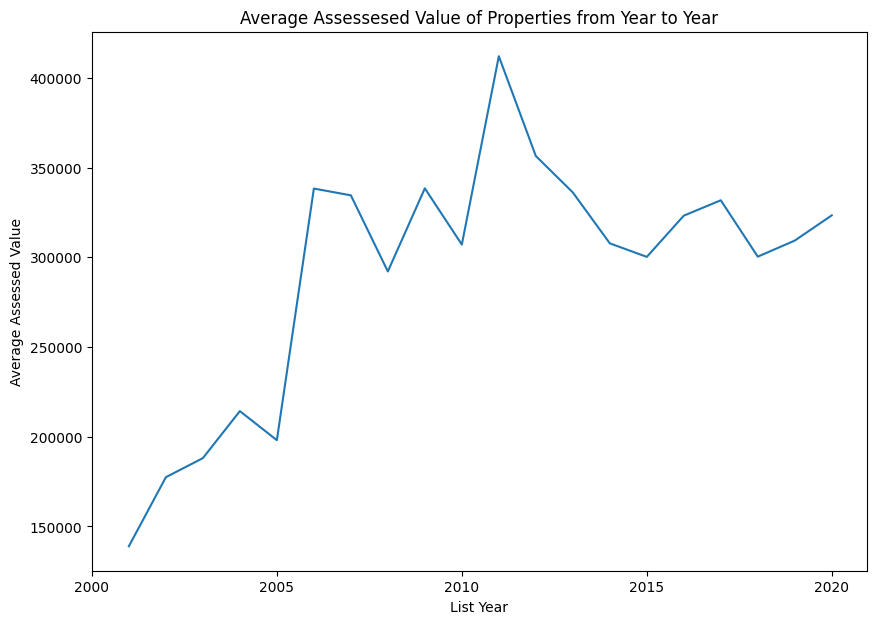

In [ ]:
# Average assessed value of properties from year to year? (2001-2020)

# Groups the data by "List Year" and calculates the mean of "Assessed Value" for each year
avg_assessed_value = df.groupby('List Year')['Assessed Value'].mean().reset_index()

# Adjusts the size of the graph
plt.figure(figsize=(10, 7))

# Creates the actual graph
sns.lineplot(x='List Year', y='Assessed Value', data=avg_assessed_value)

# Creates title & labels for the graph
plt.title('Average Assessesed Value of Properties from Year to Year')
plt.xlabel('List Year')
plt.ylabel('Average Assessed Value')

# Changes the ticks on the x-axis to make more sense
plt.xticks([2000, 2005, 2010, 2015, 2020])

# Shows the graph
plt.show()

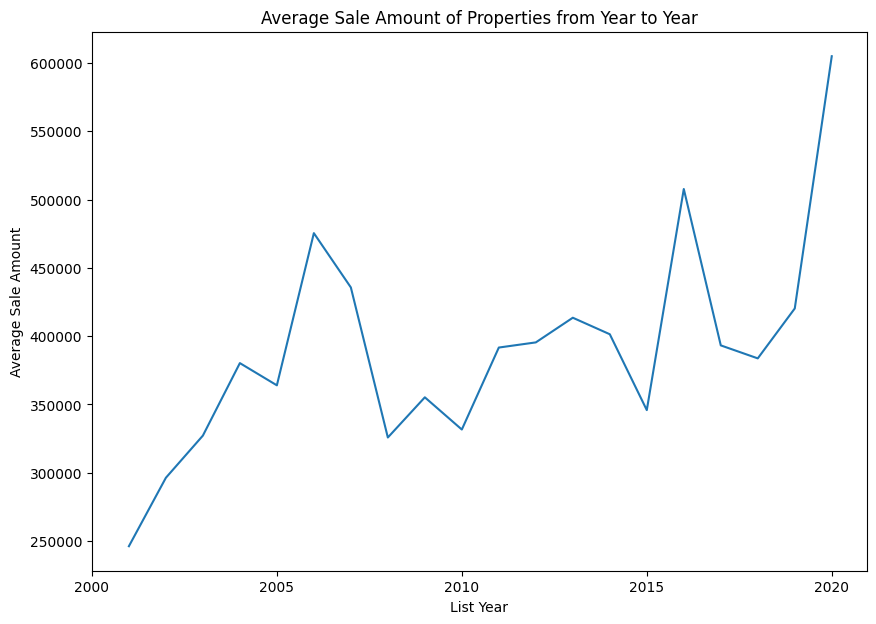

In [ ]:
# Average sale amount of properties from year to year? (2001-2020)

# Groups the data by "List Year" and calculates the mean of "Sale Amount" for each year
avg_sale_amount = df.groupby('List Year')['Sale Amount'].mean().reset_index()

# Ajusts the size of the graph
plt.figure(figsize=(10, 7))

# Creates the actual graph
sns.lineplot(x='List Year', y='Sale Amount', data=avg_sale_amount)

# Creates title & labels for the graph
plt.title('Average Sale Amount of Properties from Year to Year')
plt.xlabel('List Year')
plt.ylabel('Average Sale Amount')

# Changes the ticks on the x-axis to make more sense
plt.xticks([2000, 2005, 2010, 2015, 2020])

# Shows the graph
plt.show()

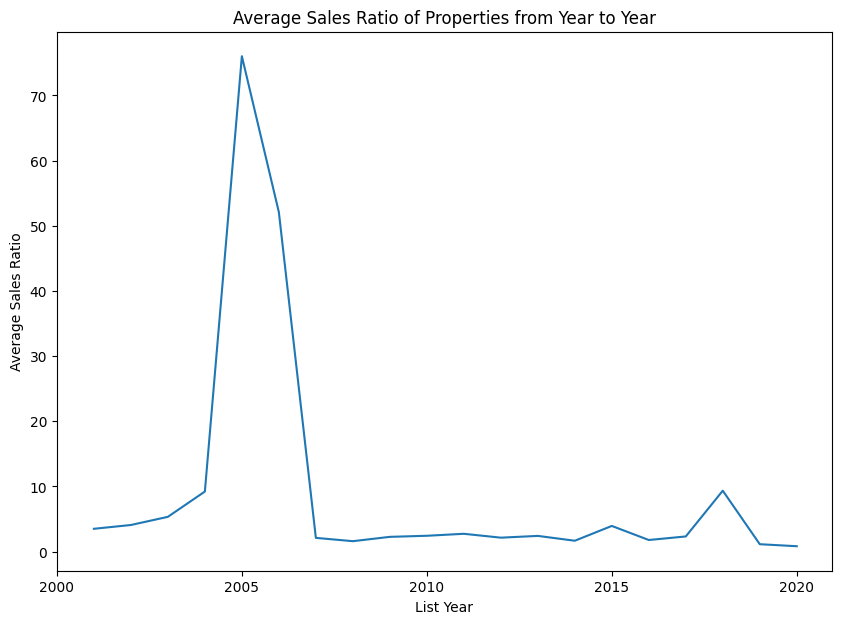

In [ ]:
# Average sales ratio of properties from year to year? (2001-2020)

# Groups the data by "List Year" and calculates the mean of "Sales Ratio" for each year
avg_sales_ratio = df.groupby('List Year')['Sales Ratio'].mean().reset_index()

# Adjusts the size of the graph
plt.figure(figsize=(10, 7))

# Creates the actual graph
sns.lineplot(x='List Year', y='Sales Ratio', data=avg_sales_ratio)

# Creates title and labels for the graph
plt.title('Average Sales Ratio of Properties from Year to Year')
plt.xlabel('List Year')
plt.ylabel('Average Sales Ratio')

# Changes the ticks on the x-axis to make more sense
plt.xticks([2000, 2005, 2010, 2015, 2020])

# Shows the graph
plt.show()